<a href="https://colab.research.google.com/github/zulfijauh/Data-Science/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset: https://www.kaggle.com/datasets/shree1992/housedata

# Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats
from imblearn.metrics import sensitivity_specificity_support
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel

from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Data Understanding

In [63]:
data = pd.read_csv('https://raw.githubusercontent.com/zulfijauh/Data-Science/main/Dataset/House%20price%20prediction.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [64]:
# Check null value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [65]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


# Data Cleaning

In [66]:
# Round value of bedrooms, bathrooms and price
data['bedrooms'] = data['bedrooms'].round()
data['bathrooms'] = data['bathrooms'].round()
data['price'] = data['price'].round(decimals=2)
# Change statezip datatype
data['statezip'] = data['statezip'].replace("WA 9", "9",regex=True)
data['statezip'] = data['statezip'].astype(int)

In [67]:
# Check unique value for country. This variable only contain 1 values. This variable is ok to drop
data['country'].value_counts()

USA    4600
Name: country, dtype: int64

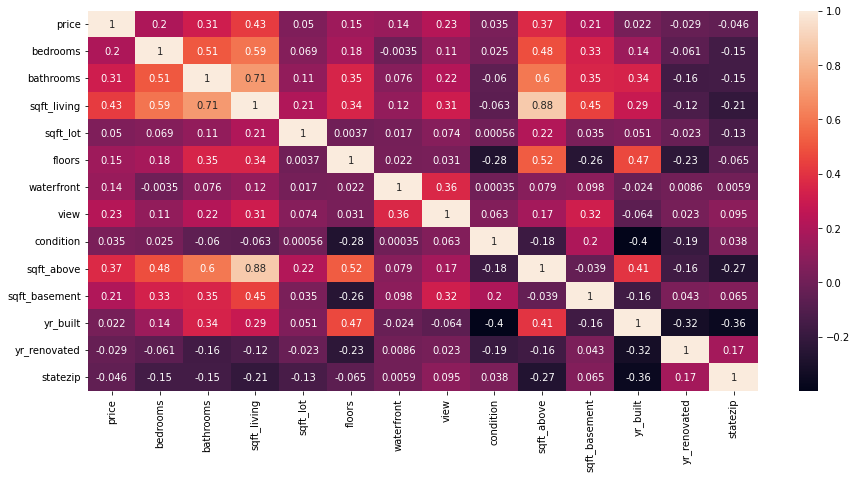

In [68]:
# Check the correlation to price. Negative correlation is ok to drop
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot = True)
plt.show()

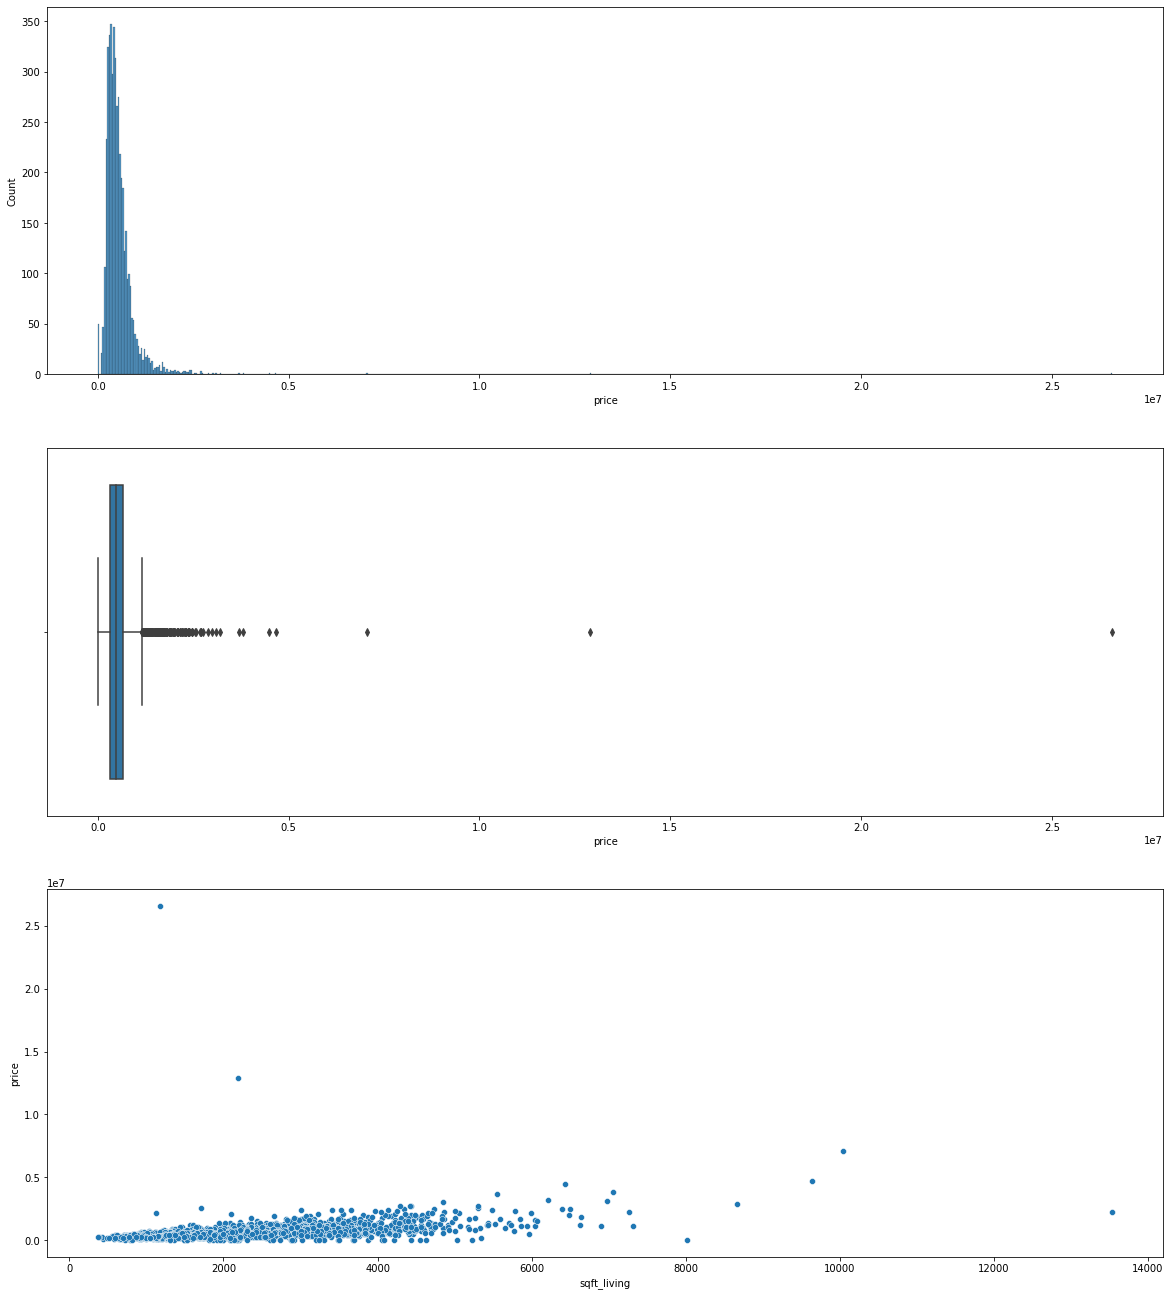

In [69]:
# Data spread by Price

f,ax = plt.subplots(3,1,figsize=(20,23))
sns.histplot(x = 'price',data=data, ax=ax[0])
sns.boxplot(x = 'price',data=data, ax=ax[1])
sns.scatterplot(x= 'sqft_living',y = 'price',data=data, ax=ax[2])

In [70]:
# Data with inconsistent values
data.loc[(data['price'] == 0)].head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4354,2014-05-05 00:00:00,0.0,3.0,2.0,1490,10125,1.0,0,0,4,1490,0,1962,0,3911 S 328th St,Federal Way,98001,USA
4356,2014-05-05 00:00:00,0.0,4.0,3.0,2600,5390,1.0,0,0,4,1300,1300,1960,2001,2120 31st Ave W,Seattle,98199,USA
4357,2014-05-05 00:00:00,0.0,6.0,3.0,3200,9200,1.0,0,2,4,1600,1600,1953,1983,12271 Marine View Dr SW,Burien,98146,USA
4358,2014-05-06 00:00:00,0.0,5.0,4.0,3480,36615,2.0,0,0,4,2490,990,1983,0,21809 SE 38th Pl,Issaquah,98075,USA
4361,2014-05-07 00:00:00,0.0,5.0,2.0,1500,7112,1.0,0,0,5,760,740,1920,0,14901-14999 12th Ave SW,Burien,98166,USA


In [71]:
# Data with inconsistent values
data.loc[(data['bedrooms'] == 0)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2365,2014-06-12 00:00:00,1095000.0,0.0,0.0,3064,4764,3.5,0,2,3,3064,0,1990,2009,814 E Howe St,Seattle,98102,USA
3209,2014-06-24 00:00:00,1295648.0,0.0,0.0,4810,28008,2.0,0,0,3,4810,0,1990,2009,20418 NE 64th Pl,Redmond,98053,USA


In [72]:
# Check the outliers (most expensive)
data.sort_values(by=['price'],ascending=False).head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4350,2014-07-03 00:00:00,26590000.0,3.0,2.0,1180,7793,1.0,0,0,4,1180,0,1992,0,12005 SE 219th Ct,Kent,98031,USA
4346,2014-06-23 00:00:00,12899000.0,3.0,2.0,2190,11394,1.0,0,0,3,1550,640,1956,2001,5426 40th Ave W,Seattle,98199,USA
2286,2014-06-11 00:00:00,7062500.0,5.0,4.0,10040,37325,2.0,1,2,3,7680,2360,1940,2001,4442 95th Ave NE,Bellevue,98004,USA
2654,2014-06-17 00:00:00,4668000.0,5.0,7.0,9640,13068,1.0,1,4,3,4820,4820,1983,2009,5044 Butterworth Rd,Mercer Island,98040,USA
2761,2014-06-18 00:00:00,4489000.0,4.0,3.0,6430,27517,2.0,0,0,3,6430,0,2001,0,1149-1199 91st Ave NE,Bellevue,98004,USA


In [73]:
# Comparing feature of the most expensive price with the same house in their neighborhood 
data.loc[(data['statezip']== 98031)].sort_values(by=['price'],ascending=False).head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4350,2014-07-03 00:00:00,26590000.0,3.0,2.0,1180,7793,1.0,0,0,4,1180,0,1992,0,12005 SE 219th Ct,Kent,98031,USA
1152,2014-05-22 00:00:00,430000.0,4.0,3.0,3220,8936,2.0,0,0,3,2450,770,1990,2009,20301 96th Ave S,Kent,98031,USA
3580,2014-06-27 00:00:00,399950.0,3.0,2.0,2570,10431,2.0,0,0,3,2570,0,1989,0,9531 S 204th Pl,Kent,98031,USA


In [74]:
# Comparing feature of 2nd most expensive price with the same house in their neighborhood
data.loc[(data['statezip']==98199)].sort_values(by=['price'],ascending=False).head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4346,2014-06-23 00:00:00,12899000.00,3.0,2.0,2190,11394,1.0,0,0,3,1550,640,1956,2001,5426 40th Ave W,Seattle,98199,USA
4465,2014-06-05 00:00:00,2560498.33,3.0,2.0,1710,1664,2.0,0,0,5,1300,410,2003,0,2826 21st Ave W,Seattle,98199,USA
1355,2014-05-27 00:00:00,1655000.00,4.0,4.0,3080,4815,2.0,0,3,3,2300,780,1937,2009,2441-2499 Crane Dr W,Seattle,98199,USA


In [75]:
# Check the outliers (cheapest)
data.loc[(data['price'] > 0)].sort_values(by=['price']).head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4351,2014-05-06 00:00:00,7800.0,2.0,1.0,780,16344,1.0,0,0,1,780,0,1942,0,4229 S 144th St,Tukwila,98168,USA
1219,2014-05-23 00:00:00,80000.0,1.0,1.0,430,5050,1.0,0,0,2,430,0,1912,0,32215 E Rutherford St,Carnation,98014,USA
1587,2014-05-29 00:00:00,83000.0,2.0,1.0,900,8580,1.0,0,0,3,900,0,1918,0,14440 51st Ave S,Tukwila,98168,USA


In [76]:
# Check the outliers (widest sqft_living)
data.sort_values(by=['sqft_living'],ascending=False).head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
122,2014-05-05 00:00:00,2280000.0,7.0,8.0,13540,307752,3.0,0,4,3,9410,4130,1999,0,26408 NE 70th St,Redmond,98053,USA
2286,2014-06-11 00:00:00,7062500.0,5.0,4.0,10040,37325,2.0,1,2,3,7680,2360,1940,2001,4442 95th Ave NE,Bellevue,98004,USA
2654,2014-06-17 00:00:00,4668000.0,5.0,7.0,9640,13068,1.0,1,4,3,4820,4820,1983,2009,5044 Butterworth Rd,Mercer Island,98040,USA


In [77]:
# Create dataframe of missing datapoint by appending price = 0 and bedrooms = 0
missing = data.loc[(data['price'] == 0)].append(data.loc[(data['bedrooms'] == 0)])
# Create list that contains index of error datapoint
missing_index_list = missing.reset_index()['index'].to_list()
# Insert index of outliers
missing_index_list.extend([4351,4346,4350,122])
# Drop error datapoint
data = data.drop(missing_index_list,axis=0)

# Regression Modeling

In [80]:
# Split data to X for variable input, and y for target class
X = data.drop(['date','yr_renovated','country','price','street'],axis=1)
y = data['price']

In [81]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [82]:
# Encode
encoder = LabelEncoder()

features = X.select_dtypes(include=['object','bool']).columns
cat = list(features.values)
for i in cat:
  X_train[i] = encoder.fit_transform(X_train[i])
  X_test[i] = encoder.fit_transform(X_test[i])

## Linear Regression

In [83]:
reg = LinearRegression()
reg.fit(X_train, y_train)

print('coef of determination training ', reg.score(X_train, y_train))
print('coef of determination testing ', reg.score(X_test, y_test))
print()
print('coefficient')
print(reg.coef_)
print()
print('intercept')
print(reg.intercept_)
print()
print('prediction')
reg_pred = reg.predict(X_test)
print(reg_pred[:10])
print()
print('real value')
print(y_test[0:10].to_list())
print()
reg_mae = reg.predict(X_train)
print('Mean Absolute Error: ',mean_absolute_error(y_train, reg_mae))

coef of determination training  0.5945556006164363
coef of determination testing  0.5610182819576626

coefficient
[-5.33601181e+04  6.45847717e+04  1.67404595e+02 -5.72033207e-01
  6.27376805e+04  4.33385784e+05  6.24420698e+04  2.12221623e+04
  1.04472133e+02  6.29324620e+01 -2.82063043e+03  2.79893890e+03
 -5.41009214e+02]

intercept
58403546.017967105

prediction
[ 366539.41340631 1099619.414617    305796.87828422  279269.96441098
  339590.17623503  267024.357075    927878.865625    513259.72506355
  927846.2490752   245757.6362966 ]

real value
[395000.0, 1505000.0, 83000.0, 262500.0, 289950.0, 430000.0, 599999.0, 600000.0, 975000.0, 353250.0]

Mean Absolute Error:  151657.4044365386


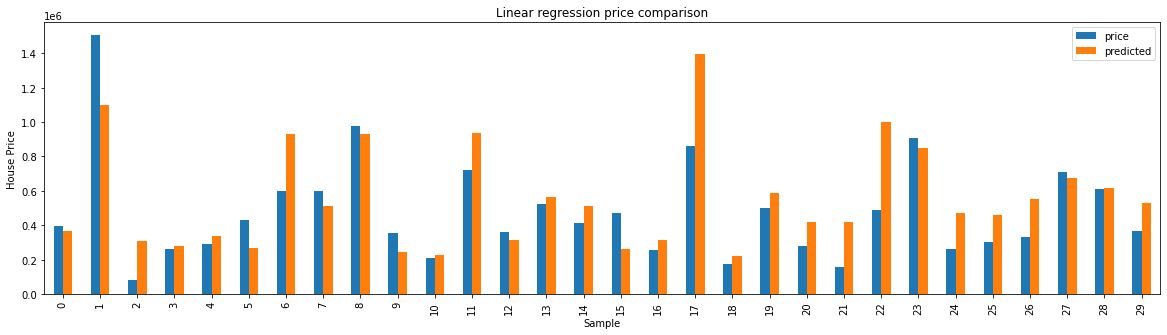

In [97]:
reg_real_price = pd.DataFrame(y_test[:30]).reset_index(drop=True)
reg_pred_price = pd.DataFrame(reg_pred[:30], columns = ['predicted'])
reg_result = pd.concat([reg_real_price, reg_pred_price], axis=1) 
reg_result.plot(kind='bar') 

plt.rcParams["figure.figsize"] = (20, 5)
plt.title("Linear regression price comparison")
plt.xlabel('Sample') 
plt.ylabel('House Price') 
plt.show()

## Laso

In [85]:
las = Lasso(alpha=0.5)
las.fit(X_train, y_train)

print('coef of determination training ', las.score(X_train, y_train))
print('coef of determination testing ', las.score(X_test, y_test))
print()
print('coefficient')
print(las.coef_)
print()
print('intercept')
print(las.intercept_)
print()
print('prediction')
las_pred = las.predict(X_test)
print(las_pred[:10])
print()
print('real value')
print(y_test[0:10].to_list())
print()
laso_mae = las.predict(X_train)
print('Mean Absolute Error: ',mean_absolute_error(y_train, laso_mae))

coef of determination training  0.5945556002817918
coef of determination testing  0.5610181627373736

coefficient
[-5.33593345e+04  6.45831400e+04  2.88781701e+02 -5.72038816e-01
  6.27348273e+04  4.33301558e+05  6.24445764e+04  2.12204828e+04
 -1.69037050e+01 -5.84443797e+01 -2.82062429e+03  2.79896825e+03
 -5.41011774e+02]

intercept
58403792.770131715

prediction
[ 366541.56605259 1099617.00859318  305798.28350898  279271.13043212
  339591.96485449  267026.08892948  927879.09347377  513260.40787253
  927850.58108772  245756.74909085]

real value
[395000.0, 1505000.0, 83000.0, 262500.0, 289950.0, 430000.0, 599999.0, 600000.0, 975000.0, 353250.0]

Mean Absolute Error:  151657.42613306906


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.754e+13, tolerance: 4.213e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


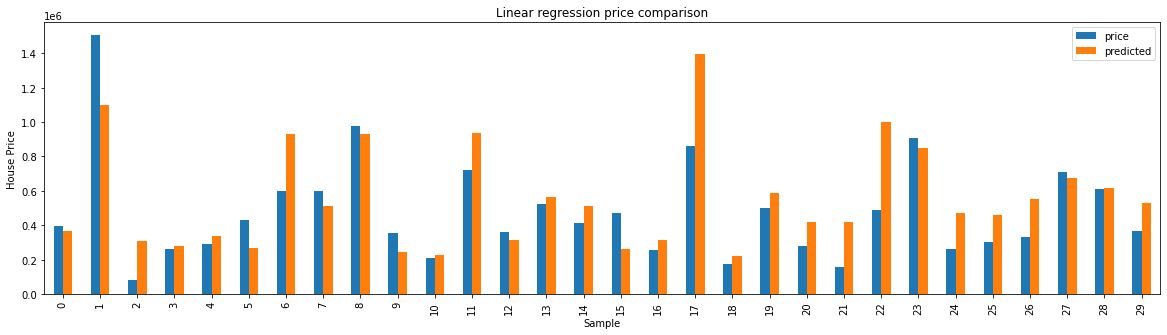

In [86]:
las_real_price = pd.DataFrame(y_test[:30]).reset_index(drop=True)
las_pred_price = pd.DataFrame(las_pred[:30], columns = ['predicted'])
las_result = pd.concat([las_real_price, las_pred_price], axis=1) 
las_result.plot(kind='bar') 

plt.rcParams["figure.figsize"] = (20, 5)
plt.title("Linear regression price comparison")
plt.xlabel('Sample') 
plt.ylabel('House Price') 
plt.show()

## Ridge

In [87]:
ri = Ridge(alpha=0.9)
ri.fit(X_train, y_train)

print('coef of determination training ', ri.score(X_train, y_train))
print('coef of determination testing ', ri.score(X_test, y_test))
print()
print('coefficient')
print(ri.coef_)
print()
print('intercept')
print(ri.intercept_)
print()
print('prediction')
ri_pred = ri.predict(X_test)
print(ri_pred[:10])
print()
print('real value')
print(y_test[0:10].to_list())
print()
ri_mae = ri.predict(X_train)
print('Mean Absolute Error: ',mean_absolute_error(y_train, ri_mae))

coef of determination training  0.594537686180014
coef of determination testing  0.560860469333409

coefficient
[-5.34185792e+04  6.45289065e+04  1.67434055e+02 -5.73099033e-01
  6.26374438e+04  4.12981605e+05  6.32182640e+04  2.11427630e+04
  1.04535773e+02  6.28985216e+01 -2.82168826e+03  2.80367828e+03
 -5.42625342e+02]

intercept
58564563.97847288

prediction
[ 366529.88018759 1099466.17955758  305863.21877753  279261.14158893
  339669.45256326  267135.89121766  927422.78085157  513235.99455416
  927932.01705902  245701.37758004]

real value
[395000.0, 1505000.0, 83000.0, 262500.0, 289950.0, 430000.0, 599999.0, 600000.0, 975000.0, 353250.0]

Mean Absolute Error:  151656.3106896309


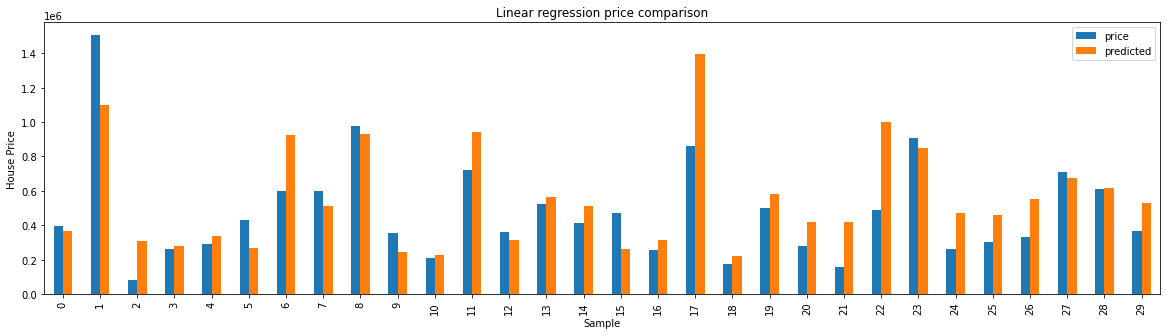

In [88]:
ri_real_price = pd.DataFrame(y_test[:30]).reset_index(drop=True)
ri_pred_price = pd.DataFrame(ri_pred[:30], columns = ['predicted'])
ri_result = pd.concat([ri_real_price, ri_pred_price], axis=1) 
ri_result.plot(kind='bar') 

plt.rcParams["figure.figsize"] = (20, 5)
plt.title("Linear regression price comparison")
plt.xlabel('Sample') 
plt.ylabel('House Price') 
plt.show()

## DecissionTree

In [103]:
dt = DecisionTreeRegressor(max_depth=18)
dt.fit(X_train, y_train)

print('coef of determination training ',dt.score(X_train, y_train))
print('coef of determination testing ',dt.score(X_test, y_test))
print()
print('prediction')
dt_pred = dt.predict(X_test)
print(dt_pred[:10])
print()
print('real value')
print(y_test[0:10].to_list())
print()
dt_mae = dt.predict(X_train)
print('Mean Absolute Error: ', mean_absolute_error(y_train, dt_mae))

coef of determination training  0.9972598608924517
coef of determination testing  0.17320083380800122

prediction
[ 264500.         1750000.          192500.          277000.
  585000.          174500.         1500000.          319290.05176471
  854000.          195000.        ]

real value
[395000.0, 1505000.0, 83000.0, 262500.0, 289950.0, 430000.0, 599999.0, 600000.0, 975000.0, 353250.0]

Mean Absolute Error:  6107.660866758263


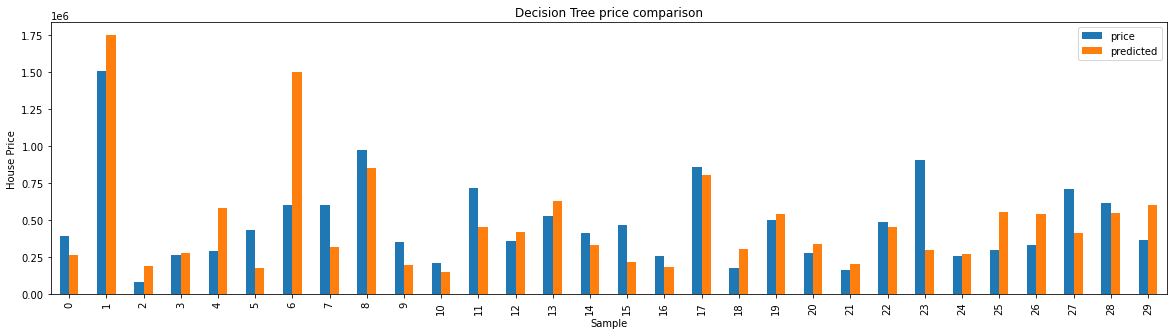

In [104]:
dt_real_price = pd.DataFrame(y_test[:30]).reset_index(drop=True)
dt_pred_price = pd.DataFrame(dt_pred[:30], columns = ['predicted'])
dt_result = pd.concat([dt_real_price, dt_pred_price], axis=1) 
dt_result.plot(kind='bar') 

plt.rcParams["figure.figsize"] = (20, 5)
plt.title("Decision Tree price comparison")
plt.xlabel('Sample') 
plt.ylabel('House Price') 
plt.show()

## Random Forest

In [116]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

print('coef of determination training ',rf.score(X_train, y_train))
print('coef of determination testing ',rf.score(X_test, y_test))
print()
print('prediction')
rf_pred = rf.predict(X_test)
print(rf_pred[:10])
print()
print('real value')
print(y_test[0:10].to_list())
print()
rf_mae = rf.predict(X_train)
print('Mean Absolute Error: ', mean_absolute_error(y_train, rf_mae))

coef of determination training  0.9560318844544508
coef of determination testing  0.5875972954817812

prediction
[ 318603.5456 1096912.3332  242665.25    316540.2276  447532.2558
  218977.448  1115631.833   460419.8492  885830.5     240999.5367]

real value
[395000.0, 1505000.0, 83000.0, 262500.0, 289950.0, 430000.0, 599999.0, 600000.0, 975000.0, 353250.0]

Mean Absolute Error:  41794.23696915016


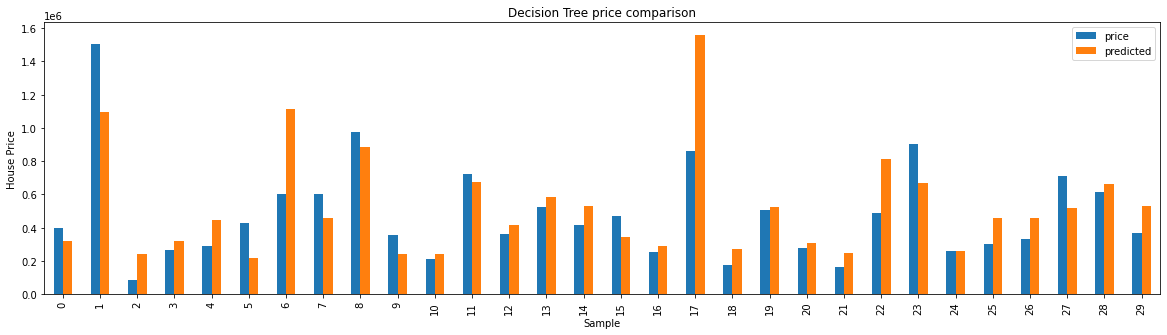

In [117]:
rf_real_price = pd.DataFrame(y_test[:30]).reset_index(drop=True)
rf_pred_price = pd.DataFrame(rf_pred[:30], columns = ['predicted'])
rf_result = pd.concat([rf_real_price, rf_pred_price], axis=1) 
rf_result.plot(kind='bar') 

plt.rcParams["figure.figsize"] = (20, 5)
plt.title("Decision Tree price comparison")
plt.xlabel('Sample') 
plt.ylabel('House Price') 
plt.show()

## MLP Regressor

In [120]:
mlpr = MLPRegressor(max_iter=200)
mlpr.fit(X_train, y_train)

print('coef of determination training ',mlpr.score(X_train, y_train))
print('coef of determination testing ',mlpr.score(X_test, y_test))
print()
print('prediction')
mlpr_pred = mlpr.predict(X_test)
print(mlpr_pred[:10])
print()
print('real value')
print(y_test[0:10].to_list())
print()
mlpr_mae = mlpr.predict(X_train)
print('Mean Absolute Error: ', mean_absolute_error(y_train, mlpr_mae))

coef of determination training  0.4904843324954713
coef of determination testing  0.4735103335473957

prediction
[ 506789.37055475  910582.46396562  222716.47776101  291408.77962032
  426171.23575614  247775.958783   1003556.49538737  611652.24590609
 1103130.08580445  267766.29997528]

real value
[395000.0, 1505000.0, 83000.0, 262500.0, 289950.0, 430000.0, 599999.0, 600000.0, 975000.0, 353250.0]

Mean Absolute Error:  171820.73595630602


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


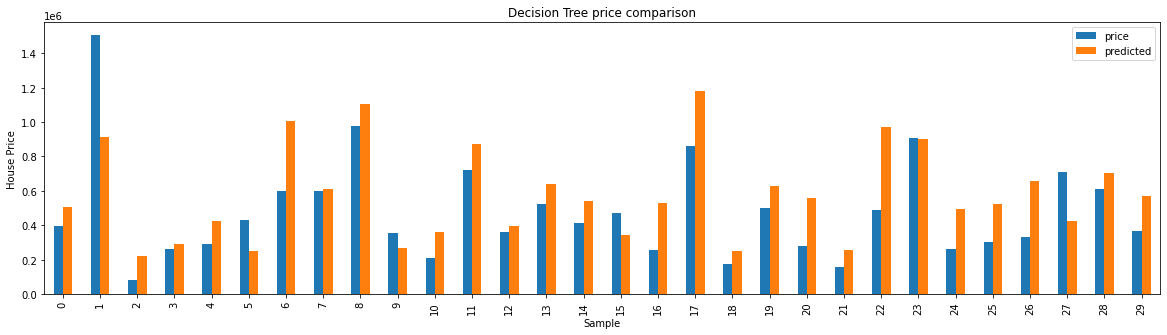

In [121]:
mlpr_real_price = pd.DataFrame(y_test[:30]).reset_index(drop=True)
mlpr_pred_price = pd.DataFrame(mlpr_pred[:30], columns = ['predicted'])
mlpr_result = pd.concat([mlpr_real_price, mlpr_pred_price], axis=1) 
mlpr_result.plot(kind='bar') 

plt.rcParams["figure.figsize"] = (20, 5)
plt.title("Decision Tree price comparison")
plt.xlabel('Sample') 
plt.ylabel('House Price') 
plt.show()